# Our Dataset 

https://www.kaggle.com/usdot/nhtsa-traffic-fatalities

In [2]:
#only palakh
import os
os.chdir("D:/Palakh Data/Downloads")
print(os.getcwd())

D:\Palakh Data\Downloads


In [3]:
%matplotlib inline
import pandas as pd
from google.cloud import bigquery
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Create a "Client" object
client = bigquery.Client.from_service_account_json('My First Project-4cf1aba3f96c.json')

In [5]:
# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

In [6]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
print("The multiple tables we worked with")
for table in tables:  
    print(table.table_id)

The multiple tables we worked with
accident_2015
accident_2016
cevent_2015
cevent_2016
damage_2015
damage_2016
distract_2015
distract_2016
drimpair_2015
drimpair_2016
factor_2015
factor_2016
maneuver_2015
maneuver_2016
nmcrash_2015
nmcrash_2016
nmimpair_2015
nmimpair_2016
nmprior_2015
nmprior_2016
parkwork_2015
parkwork_2016
pbtype_2015
pbtype_2016
person_2015
person_2016
safetyeq_2015
safetyeq_2016
vehicle_2015
vehicle_2016
vevent_2015
vevent_2016
vindecode_2015
vindecode_2016
violatn_2015
violatn_2016
vision_2015
vision_2016
vsoe_2015
vsoe_2016


In [7]:
# --Construct a reference to the "accident_2016" table
table_ref = dataset_ref.table("accident_2016")
# --API request - fetch the table
table = client.get_table(table_ref)
# --Print information on all the columns in the "accident_2015" table in the "nhtsa_traffic_fatalities" dataset
table.schema
# type(table)
# --google.cloud.bigquery.table.Table
# client.list_rows(table, max_results=5).to_dataframe()

[SchemaField('state_number', 'INTEGER', 'NULLABLE', 'This data element identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC). For more info on the codes, please look at <C1/V1/D1/PC1/P1/NM1 State Number> section in the pdf: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315', ()),
 SchemaField('state_name', 'STRING', 'NULLABLE', 'This data element identifies the state in which the crash occurred. The codes are from the General Services Administration’s (GSA) publication of worldwide Geographic Location Codes (GLC).', ()),
 SchemaField('consecutive_number', 'INTEGER', 'NULLABLE', 'This data element is the unique case number assigned to each crash. It appears on each data file and is used to merge information from the data files together. xxxxxx Two Characters for State Code followed by Four Characters for Case Number', ()),
 SchemaField('number_of_vehicle_f

In [8]:
# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,56,Wyoming,560099,1,1,0,0,0,1,1,...,88,0,None,0,None,0,None,1,0,2016-12-04 03:45:00+00:00
1,16,Idaho,160226,1,1,0,0,0,3,3,...,99,0,None,0,None,0,None,2,0,2016-12-16 16:33:00+00:00
2,5,Arkansas,50006,1,1,0,0,0,2,2,...,99,20,Police-Pursuit-Involved (Since 1994),0,None,0,None,1,0,2016-01-06 03:36:00+00:00
3,48,Texas,482027,1,1,0,0,0,5,5,...,35,0,None,0,None,0,None,1,0,2016-08-07 15:28:00+00:00
4,12,Florida,121570,1,1,0,0,0,5,5,...,99,0,None,0,None,0,None,1,0,2016-07-21 19:37:00+00:00


In [9]:
# Create the accident_2016 dataframe
accident_2016 = client.list_rows(table).to_dataframe()
accident_2016.shape

(34748, 70)

In [10]:
# Create the accident_2015 dataframe
table_ref = dataset_ref.table("accident_2015")
table = client.get_table(table_ref)
accident_2015 = client.list_rows(table).to_dataframe()
accident_2015.shape

(32538, 70)

In [11]:
# -----creating event series data dataframe
table_ref = dataset_ref.table("cevent_2015")
table = client.get_table(table_ref)
cevent_2015 = client.list_rows(table).to_dataframe()

# cevent_2015[:10]

In [12]:
# -----creating event series data dataframe
table_ref = dataset_ref.table("cevent_2016")
table = client.get_table(table_ref)
cevent_2016 = client.list_rows(table).to_dataframe()
cevent_2016.shape
# cevent_2015[:10]

(103751, 11)

In [15]:
accident = accident_2015.append(accident_2016)
# print(accident.shape)
# print(accident_2015.shape[0]+accident_2016.shape[0])

accident.replace(['Unknown','unknown'],np.nan, inplace=True)
print (accident.isnull().sum().sum())
# accident.info()
len(accident['consecutive_number'].unique())
print("Creating one common dataframe - accident")
#print(accident.head())

3779
Creating one common dataframe - accident


![Note%2015-Nov-2019.png](attachment:Note%2015-Nov-2019.png)



ANALYSIS :

### When are the accidents happening ?

- We analysed accidents based on month , day of week and hour of the day.

##### In terms of hour of the days, one can clearly see that the accidents are steadily increasing in the hours between 10 am to 8 pm in the night. It is at its peak at around 7 pm.

- Day of the week weekends (sunday(1)) have higher accidents than weekdays. 

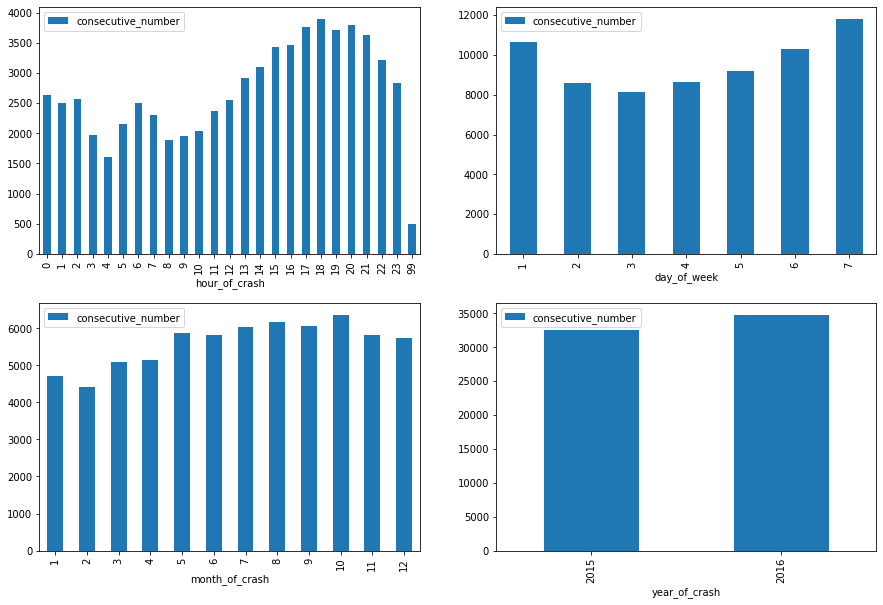

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
acc_hr = accident.groupby('hour_of_crash')[['consecutive_number']].count()
acc_hr.plot(ax=ax[0,0],kind='bar')
acc_week = accident.groupby('day_of_week')[['consecutive_number']].count()
acc_week.plot(ax=ax[0,1],kind='bar')
acc_month = accident.groupby('month_of_crash')[['consecutive_number']].count()
acc_month.plot(ax=ax[1,0],kind='bar')
acc_year = accident.groupby('year_of_crash')[['consecutive_number']].count()
acc_year.plot(ax=ax[1,1],kind='bar')
show()

#### Analyzing does the geographic location have any effect on accidents, we find the top and bottom 5 states

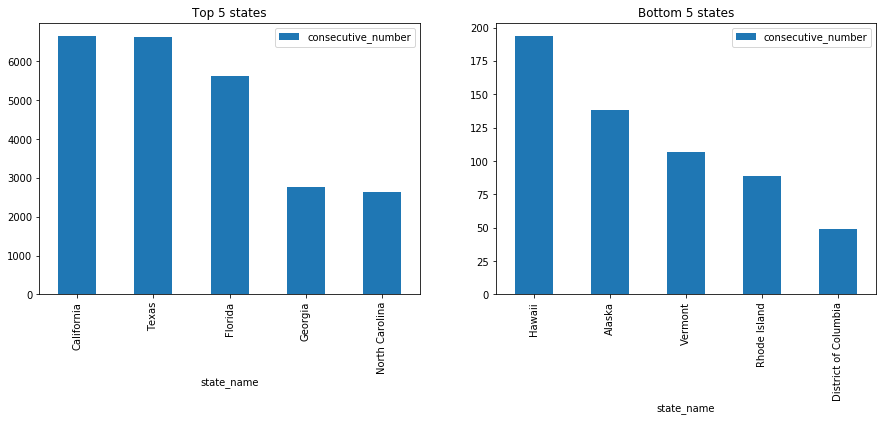

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
acc_state = accident.groupby('state_name')[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False)
acc_state[:5].plot(ax=ax[0],kind='bar',title='Top 5 states')
acc_state[-5:].plot(ax=ax[1],kind='bar',title='Bottom 5 states')
show()

- In the above graphs, we can see the states where there are maximum accidents are california,Texas and Florida. This is not surprising as we know that these are the highly populated states in the USA. 

#### Definition (Land Use): The classification of the segment of the trafficway on which the crash occurred based on the Federal Highway Administration (FHWA) approved adjusted Census boundaries of small urban and urbanized areas.

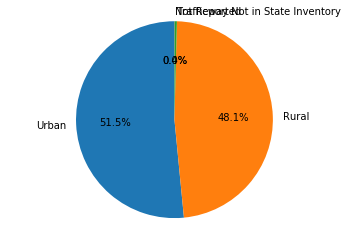

In [19]:
land_use = accident['land_use_name'].value_counts().sort_values(ascending=False)
labels = land_use.index
sizes = land_use.values
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  
plt.show()

- The divide of accidents between urban areas and rural areas is almost similar. for urban it is 51.5% where as for rural it is 48%

#### Definition (Functional System): This element identifies the functional classification of the segment of the trafficway on which the crash occurred.


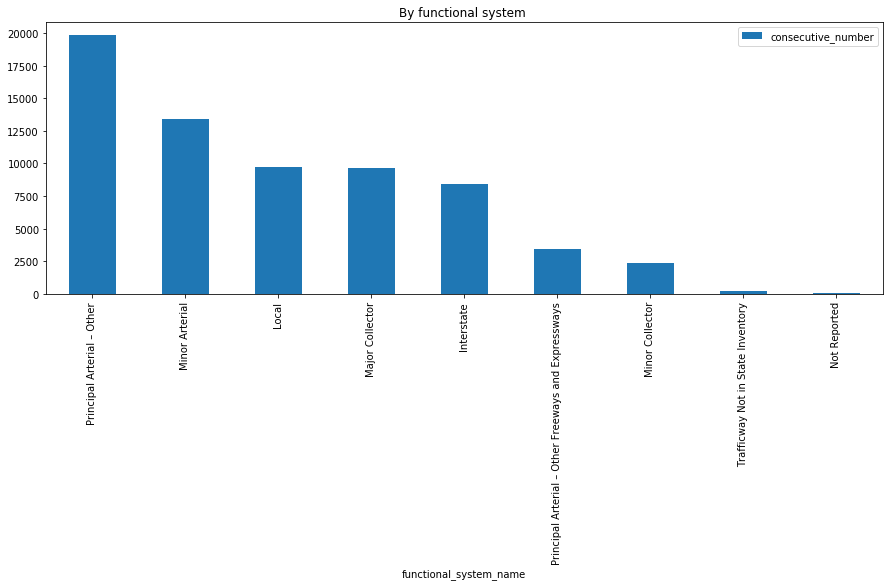

In [20]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
acc_fs = accident.groupby('functional_system_name')[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False)
acc_fs.plot(ax=ax,kind='bar',title='By functional system ')
show()

In [21]:
accident.groupby('national_highway_system')[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False)


,consecutive_number
national_highway_system,
0,41834
1,25291
9,161


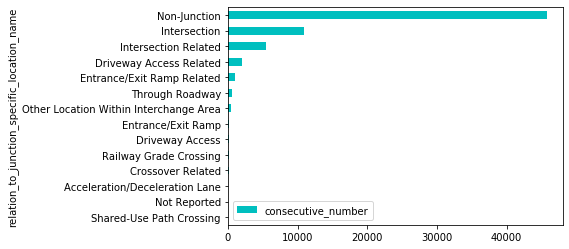

In [22]:
accident.groupby("relation_to_junction_specific_location_name")[['consecutive_number']].count().sort_values(by='consecutive_number').plot(kind='barh',color ='c')

In [23]:
accident.groupby("relation_to_junction_specific_location_name")[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False)

,consecutive_number
relation_to_junction_specific_location_name,
Non-Junction,45743
Intersection,10941
Intersection Related,5530
Driveway Access Related,2018
Entrance/Exit Ramp Related,964
Through Roadway,656
Other Location Within Interchange Area,522
Entrance/Exit Ramp,226
Driveway Access,219


- Non-junctions are spots where most accidents are occuring followed by intersections. 
- Given, so many different types of intersections, we wanted to look at which intersection most accident prone.

- The four-way intersection is most prone to accidents

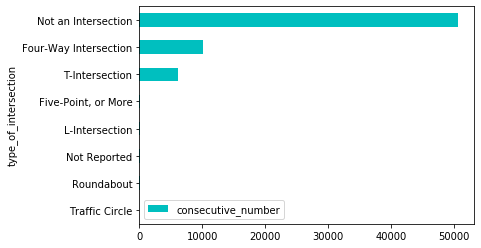

In [24]:
accident.groupby("type_of_intersection")[['consecutive_number']].count().sort_values(by='consecutive_number').plot(kind='barh',color ='c')

Text(0.5, 0, 'Number of accidents')

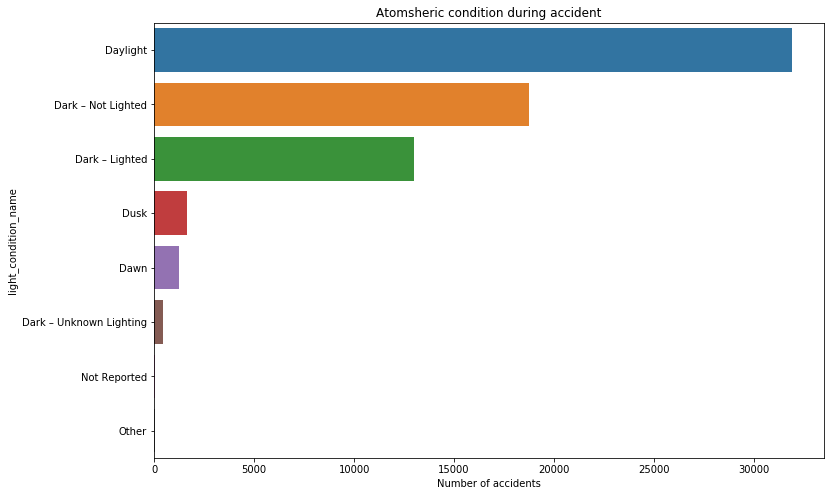

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
fig,ax = plt.subplots(figsize=(12,8))
descending_order = accident['light_condition_name'].value_counts().sort_values(ascending=False).index
sns.countplot(y="light_condition_name",data=accident, order = descending_order )
ax.set_title('Atomsheric condition during accident');
plt.xlabel('Number of accidents')

- It seems like most of the accidents are happening during daylight. 

- The average number accidents by hour graph also showed increasing number of accidents in after 11 am. The accidents increased futher during the day till 20:00 hours as seen in the graph.

- The following table below gives a breakdown in terms of percentage and we see that 47% of the accidents are during daylight.This can also be related to the number accidents by hour graph.


In [26]:
light = accident['light_condition_name'].value_counts().sort_values(ascending=False)
light_percent = 100*light/len(accident)

light_df = pd.DataFrame(
    {'Numbers': light ,
     'Percentages': light_percent,
    })
light_df.sort_values(by=['Numbers'],ascending=False).fillna(0)

,Numbers,Percentages
Daylight,31910,47.424427
Dark – Not Lighted,18738,27.848289
Dark – Lighted,12983,19.295247
Dusk,1615,2.400202
Dawn,1262,1.875576
Dark – Unknown Lighting,422,0.627174
Not Reported,42,0.062420
Other,26,0.038641


- To test the hypothesis of bad atmospheric conditions are causing the accidents, the #accidents vs the reported atmospheric condition was plotted. Following were the results as shown below :

Text(0.5, 0, 'Number of accidents')

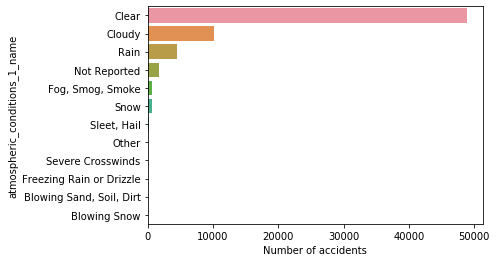

In [27]:
atmospheric = accident['atmospheric_conditions_1_name'].value_counts().sort_values(ascending=False)
descending_order = accident['atmospheric_conditions_1_name'].value_counts().sort_values(ascending=False).index
sns.countplot(y="atmospheric_conditions_1_name",data=accident, order = descending_order )
ax.set_title('Atomsheric condition during accident');
plt.xlabel('Number of accidents')

- Most accidents are happening during clear weather! The percentage were calculated  a whopping 72% of them were in during clear atmospheric conditions

In [28]:
atmospheric_percent = 100*atmospheric/len(accident)

atmospheric_df = pd.DataFrame(
    {'Numbers': atmospheric ,
     'Percentages': atmospheric_percent,
    })
atmospheric_df.sort_values(by=['Numbers'],ascending=False).fillna(0)

,Numbers,Percentages
Clear,48819,72.554469
Cloudy,10144,15.075944
Rain,4522,6.720566
Not Reported,1654,2.458164
"Fog, Smog, Smoke",727,1.080463
Snow,638,0.948191
"Sleet, Hail",158,0.234819
Other,108,0.160509
Severe Crosswinds,64,0.095116
Freezing Rain or Drizzle,38,0.056475


- Exploring accidents due to drunk drinking, what we observe is that 27.5% were due to drunk drivers. So , the major of the accidents were when the drivers were sober and in their senses.

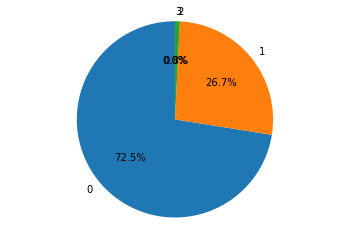

In [29]:
descending_order = accident['number_of_drunk_drivers'].value_counts().sort_values(ascending=False).index

labels = descending_order
sizes = accident['number_of_drunk_drivers'].value_counts().sort_values(ascending=False).values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

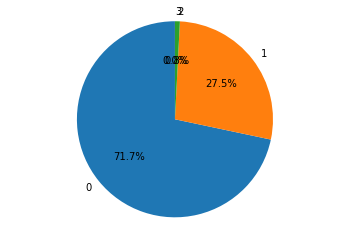

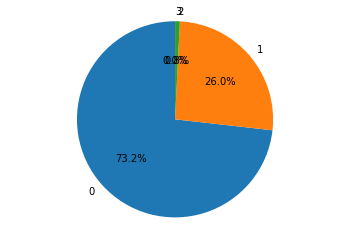

In [30]:
descending_order = accident_2015['number_of_drunk_drivers'].value_counts().sort_values(ascending=False).index

labels = descending_order
sizes = accident_2015['number_of_drunk_drivers'].value_counts().sort_values(ascending=False).values


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
descending_order = accident_2016['number_of_drunk_drivers'].value_counts().sort_values(ascending=False).index
labels = descending_order
sizes = accident_2016['number_of_drunk_drivers'].value_counts().sort_values(ascending=False).values
fig1, ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### The first pie chart is for 2015 and second for 2016. There seems to be no difference between the two years in terms of accidents due to drunk driving

Text(0.5, 0, 'Number of accidents')

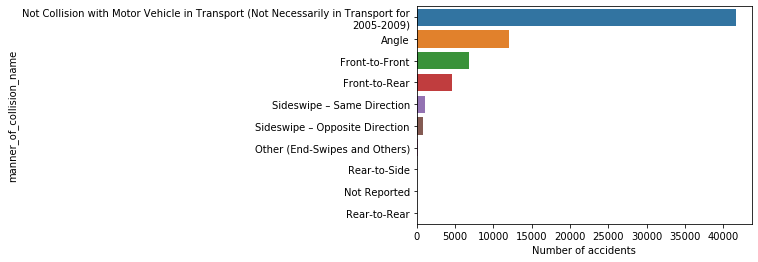

In [31]:
manner = accident['manner_of_collision_name'].value_counts().sort_values(ascending=False)
descending_order = accident['manner_of_collision_name'].value_counts().sort_values(ascending=False).index
sns.countplot(y="manner_of_collision_name",data=accident, order = descending_order )
ax.set_title('Manner of collision during accident');
plt.xlabel('Number of accidents')

In [32]:
manner_percent = 100*manner/len(accident)

Manner_collision = pd.DataFrame(
    {'Numbers': manner,
     'Percentages': manner_percent,

    })
Manner_collision

,Numbers,Percentages
Not Collision with Motor Vehicle in Transport (Not Necessarily in Transport for\n2005-2009),41615,61.847933
Angle,12031,17.880391
Front-to-Front,6841,10.167048
Front-to-Rear,4597,6.832030
Sideswipe – Same Direction,1047,1.556044
Sideswipe – Opposite Direction,754,1.120590
Other (End-Swipes and Others),166,0.246708
Rear-to-Side,72,0.107006
Not Reported,44,0.065393
Rear-to-Rear,3,0.004459


- What we observe is that majority were accidents which didnot involve any collision with another motor vehicle in transport

- We analysed the combinations in which the accidents are occuring for lighting condition, atmospheric condition and number of drunk drivers involved. The top 5 are shown below.

- There is only one combination in which drunk drivers are involved with about 5345 accidents.

In [33]:
accident.groupby(['light_condition_name','atmospheric_conditions_1_name','number_of_drunk_drivers'])[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False).head(5)

,,,consecutive_number
light_condition_name,atmospheric_conditions_1_name,number_of_drunk_drivers,
Daylight,Clear,0,19708
Dark – Not Lighted,Clear,0,7649
Dark – Lighted,Clear,0,6057
Dark – Not Lighted,Clear,1,5345
Daylight,Cloudy,0,4121


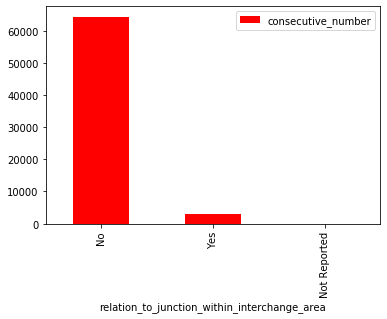

In [34]:
accident.groupby("relation_to_junction_within_interchange_area")[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False).plot(kind='bar',color ='r')

#### From the plot above, we see few accidents happening at the interchange. 

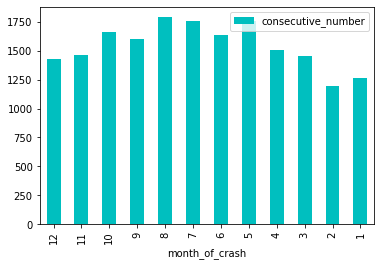

In [35]:
accident.columns.values
df = accident.groupby(['month_of_crash','number_of_drunk_drivers'])[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False).reset_index()
df_1 = df[df["number_of_drunk_drivers"]!=0]
df_1.groupby('month_of_crash')[['consecutive_number']].sum().sort_values(by='month_of_crash',ascending=False).plot(kind='bar',color = 'c')

- Above plot shows most number of drunk driving accidents happening may,july, august and october. 

- The first harmful event describes the first injury or damage producing event of the crash.

- This is not surprising but one need to dig into reasons as to the injuries most ofter happening. One should look into things  like fire, shock etc -which of the things is occuring frequently and accordinly have safety measures.

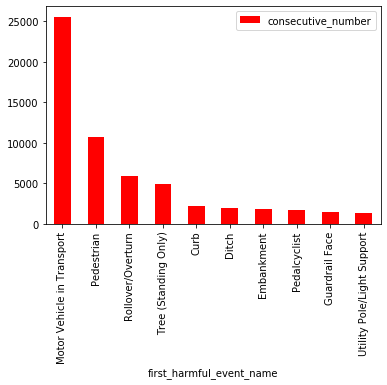

In [36]:
accident.groupby("first_harmful_event_name")[['consecutive_number']].count().sort_values(by='consecutive_number',ascending=False).head(10).plot(kind='bar',color ='r')

## Some insights/reccomendations :
1. More traffic polic should be deployed on roads, during weekends and evenings as there are higher chances of accidents happening
2. Make rules near a 4 way intersection more clear and find out the reason why more accidents happen at such an intersection
3. Drunk driving accidents happening may,july, august and october - and hence during these months, be more stringent with drunk driving to curb number of drunk driving accidents happening


- There was not information on speed and hence we could not analysis anything relating to speed.

### Now let's discuss  little about the change in geogprahy of accidents in USA and how do they vary between the two years 

In [38]:
import folium
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
usa_map= folium.Map(location=[-5.38879, 5.15899], zoom_start=2)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(accident_2015[accident_2015['hour_of_crash']<25].latitude,accident_2015[accident_2015['hour_of_crash']<25].longitude,accident_2015[accident_2015['hour_of_crash']<25].hour_of_crash):
    hour_list[hour].append([lat,log])

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(usa_map)

usa_map

In [40]:
import folium
from folium.plugins import HeatMapWithTime

# Create a map object of the city of Barcelona
usa_map= folium.Map(location=[-5.38879, 5.15899], zoom_start=2)

# Nested list that contains the latitud and the longitud of the different accidents. 
hour_list = [[] for _ in range(24)]
for lat,log,hour in zip(accident_2016[accident_2016['hour_of_crash']<25].latitude,accident_2016[accident_2016['hour_of_crash']<25].longitude,accident_2016[accident_2016['hour_of_crash']<25].hour_of_crash):
    hour_list[hour].append([lat,log])

# Labels indicating the hours
index = [str(i)+' Hours' for i in range(24)]

# Instantiate a heat map wiht time object for the car accidents
HeatMapWithTime(hour_list, index).add_to(usa_map)

usa_map

### urban or rural settings:

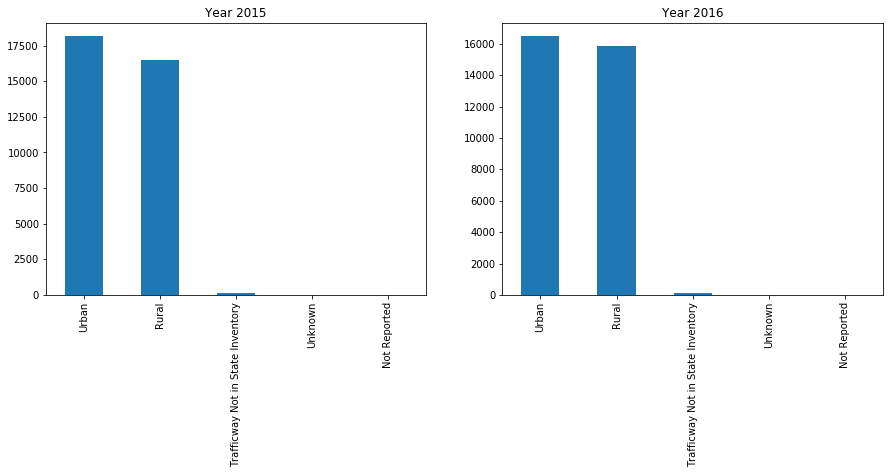

In [41]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
accident_2015['land_use_name'].value_counts()[:10].plot(ax=ax[1],kind='bar',title='Year 2016')
accident_2016['land_use_name'].value_counts()[:10].plot(ax=ax[0],kind='bar',title='Year 2015')

### Cause of fatalities

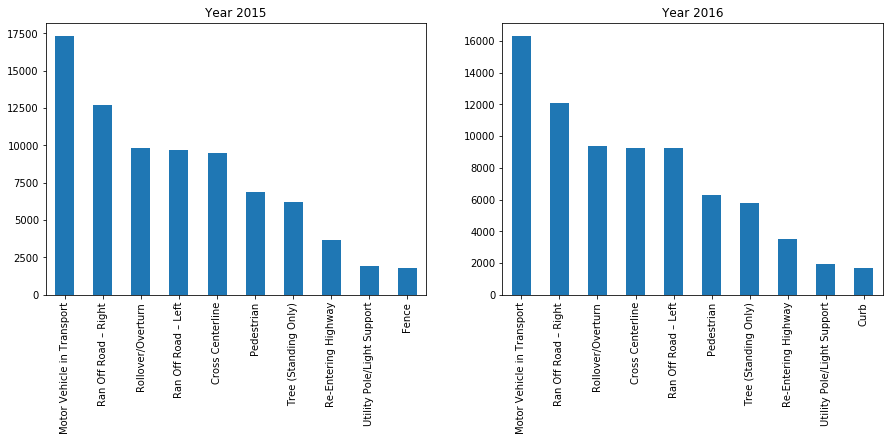

In [42]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
cevent_2015['sequence_of_events_name'].value_counts()[:10].plot(ax=ax[1],kind='bar',title='Year 2016')
cevent_2016['sequence_of_events_name'].value_counts()[:10].plot(ax=ax[0],kind='bar',title='Year 2015')

In [43]:
accident_2016.info()
df = accident_2016.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34748 entries, 0 to 34747
Data columns (total 70 columns):
state_number                                                   34748 non-null int64
state_name                                                     34748 non-null object
consecutive_number                                             34748 non-null int64
number_of_vehicle_forms_submitted_all                          34748 non-null int64
number_of_motor_vehicles_in_transport_mvit                     34748 non-null int64
number_of_parked_working_vehicles                              34748 non-null int64
number_of_forms_submitted_for_persons_not_in_motor_vehicles    34748 non-null int64
number_of_persons_not_in_motor_vehicles_in_transport_mvit      34748 non-null int64
number_of_persons_in_motor_vehicles_in_transport_mvit          34748 non-null int64
number_of_forms_submitted_for_persons_in_motor_vehicles        34748 non-null int64
county                                            

In [44]:
type(df['timestamp_of_crash'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [45]:
df['date']=pd.to_datetime(df['timestamp_of_crash'])
type(df['date'][0])
df.date.dtypes

datetime64[ns, UTC]

In [46]:
df.head()

,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash,date
0,56,Wyoming,560099,1,1,0,0,0,1,1,...,0,None,0,None,0,None,1,0,2016-12-04 03:45:00+00:00,2016-12-04 03:45:00+00:00
1,16,Idaho,160226,1,1,0,0,0,3,3,...,0,None,0,None,0,None,2,0,2016-12-16 16:33:00+00:00,2016-12-16 16:33:00+00:00
2,5,Arkansas,50006,1,1,0,0,0,2,2,...,20,Police-Pursuit-Involved (Since 1994),0,None,0,None,1,0,2016-01-06 03:36:00+00:00,2016-01-06 03:36:00+00:00
3,48,Texas,482027,1,1,0,0,0,5,5,...,0,None,0,None,0,None,1,0,2016-08-07 15:28:00+00:00,2016-08-07 15:28:00+00:00
4,12,Florida,121570,1,1,0,0,0,5,5,...,0,None,0,None,0,None,1,0,2016-07-21 19:37:00+00:00,2016-07-21 19:37:00+00:00


In [47]:
df.number_of_motor_vehicles_in_transport_mvit.unique()

array([ 1,  2,  3,  5,  4,  7,  6, 64,  9,  8, 12, 10], dtype=int64)

## How many accidents were registered by the police in the United States in 2016?

In [48]:
print('Total number of accidents in 2016 :{}'.format(df.shape[0]))

Total number of accidents in 2016 :34748


## Distribution of car accidents per month

In [49]:
import calendar
# Number of accident per month
accidents_month = df.groupby(df['date'].dt.month).count().date

# Replace the month integers by month names.
accidents_month.index=[calendar.month_name[x] for x in range(1,13)]

accidents_month

January      2354
February     2426
March        2694
April        2713
May          3005
June         3025
July         3025
August       3134
September    3154
October      3287
November     3041
December     2890
Name: date, dtype: int64

- We can observe that maximum accidents occur during the months of August- October suggesting that maybe the weather could be a factor or somethig else?

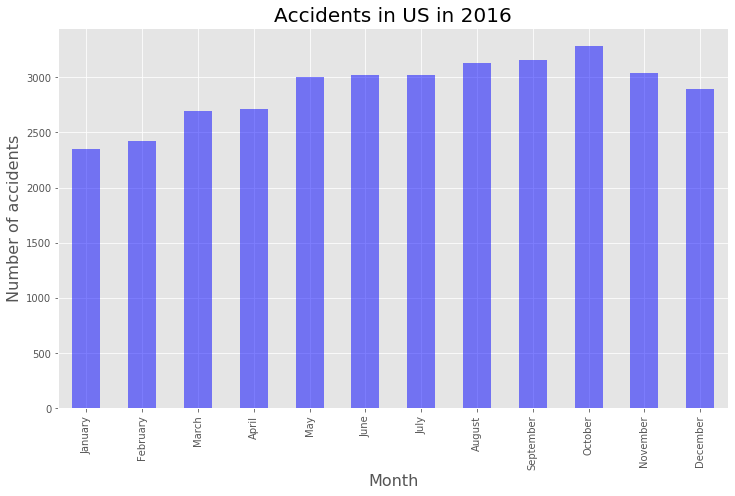

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# plot accidents per month
accidents_month.plot(kind='bar',figsize=(12,7), color='blue', alpha=0.5)

# title and x,y labels
plt.title('Accidents in US in 2016', fontsize=20)
plt.xlabel('Month',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

## Distribution of car accidents per day of the week

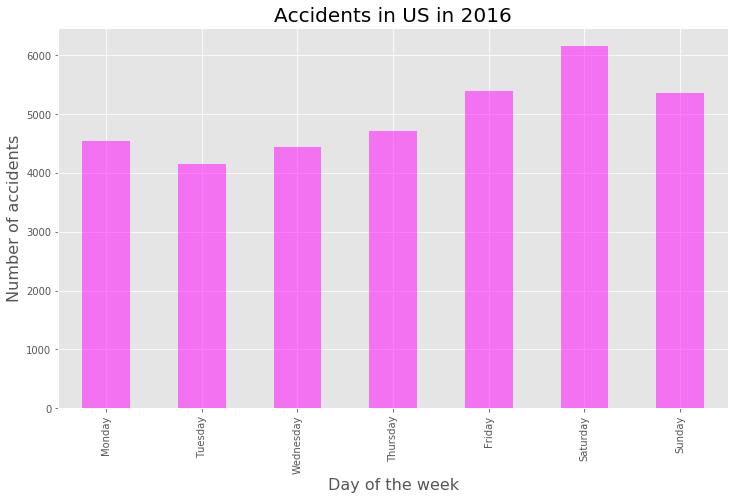

In [51]:
# Number of accident per day of the week
accidents_day = df.groupby(df['date'].dt.dayofweek).count().date

# Replace the day integers by day names.
accidents_day.index=[calendar.day_name[x] for x in range(0,7)]

# plot accidents per day
accidents_day.plot(kind='bar',figsize=(12,7), color='magenta', alpha=0.5)

# title and x,y labels
plt.title('Accidents in US in 2016', fontsize=20)
plt.xlabel('Day of the week',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

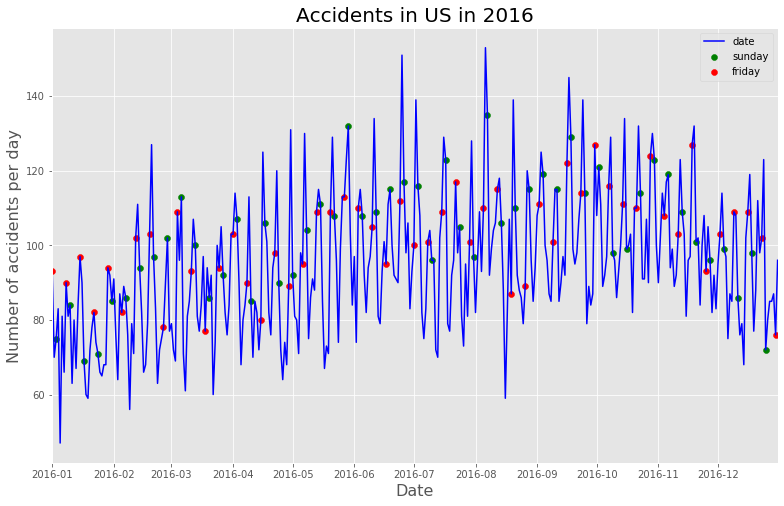

In [52]:
accidents = df.groupby(df['date'].dt.date).count().date

accidents.plot(figsize=(13,8), color='blue')

# sunday accidents
sundays = df.groupby(df[df['date'].dt.dayofweek==6].date.dt.date).count().date
plt.scatter(sundays.index, sundays, color='green', label='sunday')

# friday accidents
friday = df.groupby(df[df['date'].dt.dayofweek==4].date.dt.date).count().date
plt.scatter(friday.index, friday, color='red', label='friday')

# Title, x label and y label
plt.title('Accidents in US in 2016', fontsize=20)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Number of accidents per day',fontsize=16);
plt.legend()

 - We can also observe maximum accidents happen on Friday and Sundays. 

## Distribution of car accidents per hour 

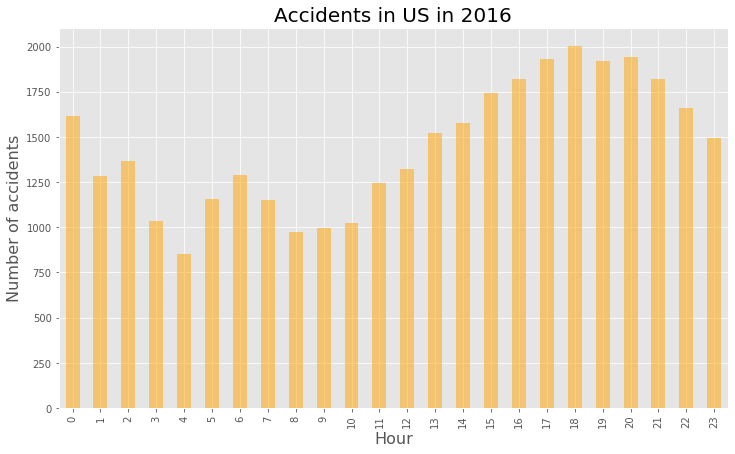

In [53]:
# Number of accident per hour
accidents_hour = df.groupby(df['date'].dt.hour).count().date

# plot accidents per hour
accidents_hour.plot(kind='bar',figsize=(12,7), color='orange', alpha=0.5)

# title and x,y labels
plt.title('Accidents in US in 2016', fontsize=20)
plt.xlabel('Hour',fontsize=16)
plt.ylabel('Number of accidents',fontsize=16);

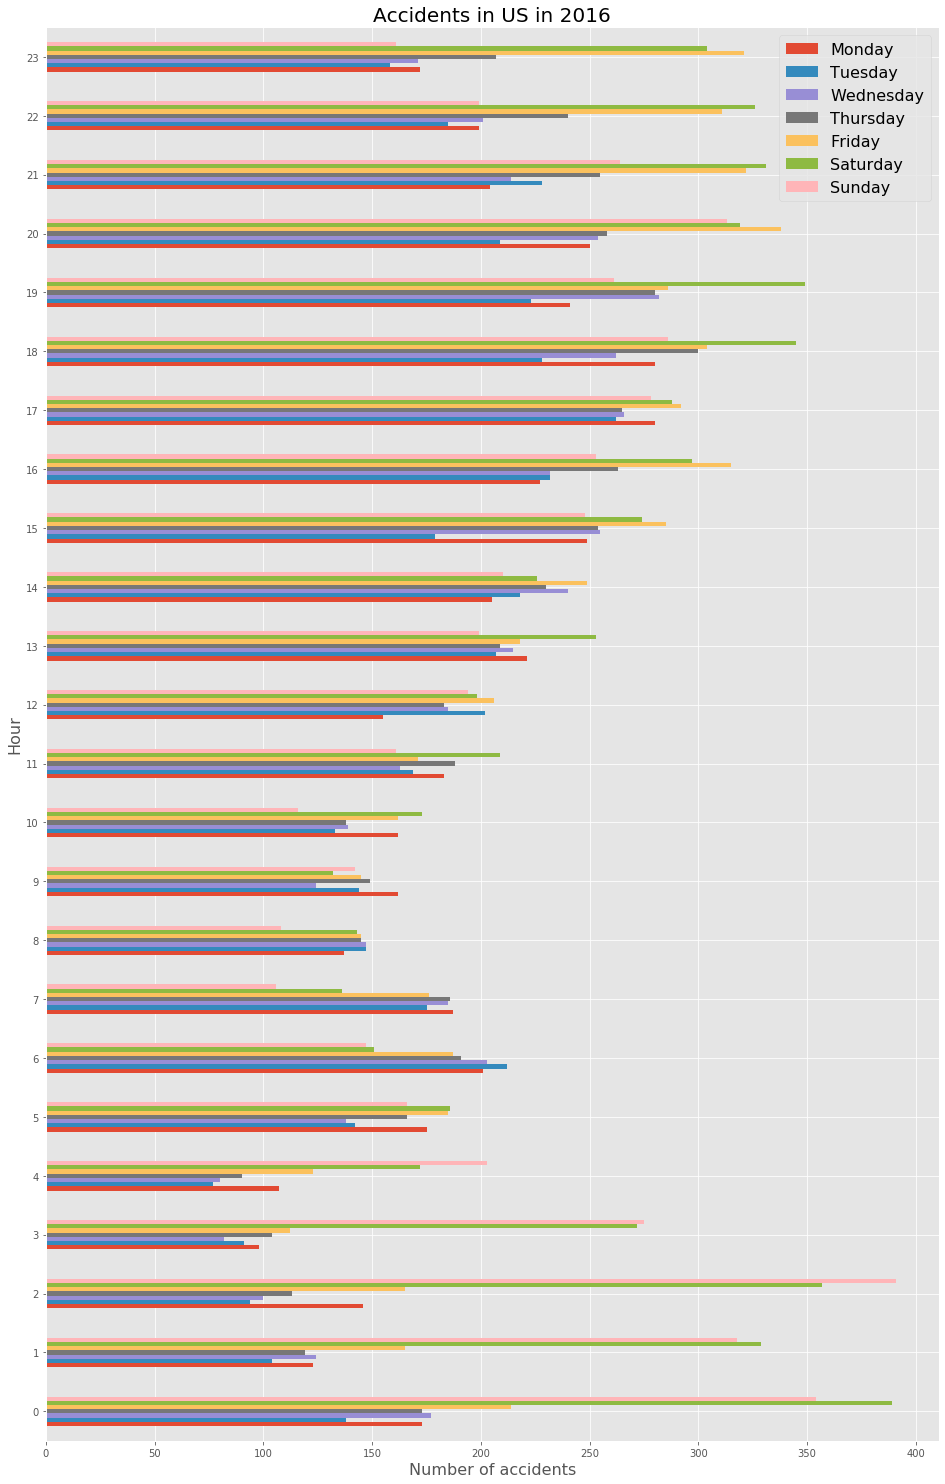

In [54]:
# Number of accident per hour and day
accidents_hour_day = df.groupby([df['date'].dt.hour.rename('hour'),df['date'].dt.dayofweek.rename('day')]).count().date

accidents_hour_day.unstack().plot(kind='barh', figsize=(16,26))

# title and x,y labels
plt.legend(labels=[calendar.day_name[x] for x in range(0,7)],fontsize=16)
plt.title('Accidents in US in 2016',fontsize=20)
plt.xlabel('Number of accidents',fontsize=16)
plt.ylabel('Hour',fontsize=16);

## Type of accident analysis

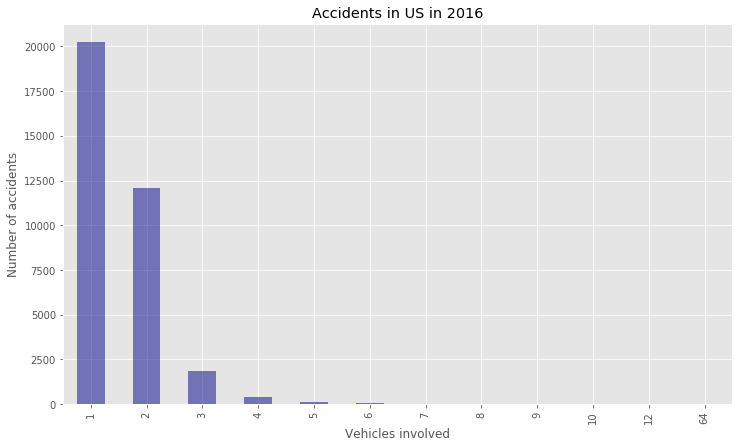

In [55]:
# Compute the number of accidents according to the number of vehicles involved
vehicles_involved = df.number_of_motor_vehicles_in_transport_mvit.value_counts()
# There is no car accident with 12 vehicles involved. We include 0 in our Serie for better visualization
vehicles_involved[12]=0

vehicles_involved.sort_index(inplace=True)

# Plot number of car accidents according to the number of vehicles involved
vehicles_involved.plot(kind='bar', figsize=(12,7), color='darkblue', alpha=0.5)

# Title and x,y labels
plt.title('Accidents in US in 2016')
plt.xlabel('Vehicles involved')
plt.ylabel('Number of accidents');

Text(0, 0.5, '')

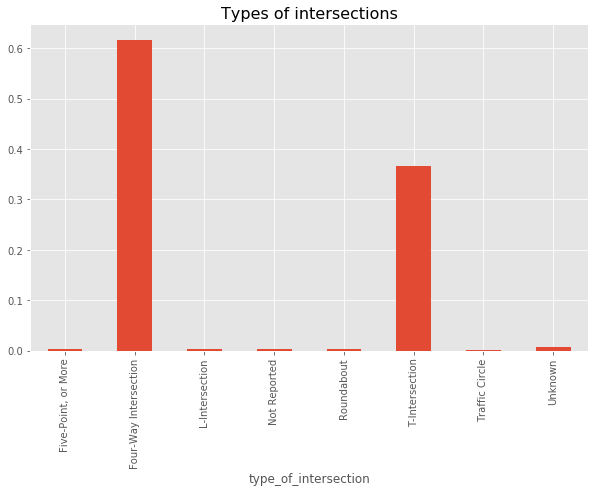

In [56]:
# Series with number of types of intersections
injuries = df.groupby('type_of_intersection')['type_of_intersection'].count()
injuries.drop(labels=['Not an Intersection'], inplace=True)

# Bar plot with the percentage of types of intersections
injuries.divide(injuries.sum()).plot(kind='bar',figsize=(10,6))

# Legend and title
plt.title('Types of intersections', fontsize=16)
plt.ylabel('')

In [57]:
# Intersection vs Non-intersection
# type_of_intersection
df['is_intersection'] = df['type_of_intersection'].apply(lambda x: "Not an Intersection" if x == "Not an Intersection" else "Intersection")
df['is_intersection']

0        Not an Intersection
1        Not an Intersection
2        Not an Intersection
3        Not an Intersection
4        Not an Intersection
                ...         
34743           Intersection
34744           Intersection
34745           Intersection
34746           Intersection
34747           Intersection
Name: is_intersection, Length: 34748, dtype: object

Text(0, 0.5, '')

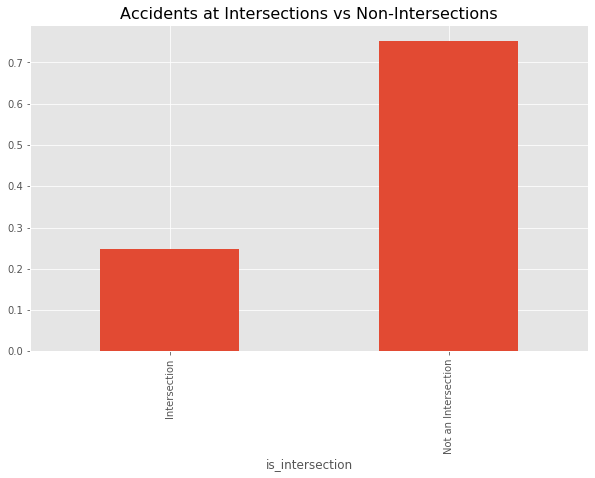

In [58]:
# Series with count of Intersection vs Non-intersection accidents
injuries = df.groupby('is_intersection')['is_intersection'].count()

# Bar plot with the percentage of intersections vs non-intersections
injuries.divide(injuries.sum()).plot(kind='bar',figsize=(10,6))

# Legend and title
plt.title('Accidents at Intersections vs Non-Intersections', fontsize=16)
plt.ylabel('')